In [ ]:
# Clone repo and install dependencies
%%capture
!git clone https://github.com/shahineb/demo-bc3-emulator.git
%cd demo-bc3-emulator
!pip install equinox diffrax healpy xarray
from tqdm.notebook import tqdm

In [2]:
# Compile and load emulator (takes ~1min)
import utils
emulator = utils.make_emulator(n_steps=30)  # More steps is better but slower

In [ ]:
# Specify GMST and month at which we emulate
ΔT = 1  # 1K anomaly wrt pre-industrial
month = 3  # March

# Generate samples
n_samples = 20
samples = []
for seed in tqdm(range(n_samples)):
  sample = emulator(ΔT, month, seed)
  samples.append(sample)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# Wrap into an xarray to manipulate
emulated_ds = utils.wrap_as_xarray(samples)
emulated_ds

<xarray.Dataset> Size: 6MB
Dimensions:  (member: 20, lat: 96, lon: 192)
Coordinates:
  * member   (member) int32 80B 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * lat      (lat) float32 384B -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Data variables:
    tas      (member, lat, lon) float32 1MB ...
    pr       (member, lat, lon) float32 1MB ...
    hurs     (member, lat, lon) float32 1MB ...
    sfcWind  (member, lat, lon) float32 1MB ...

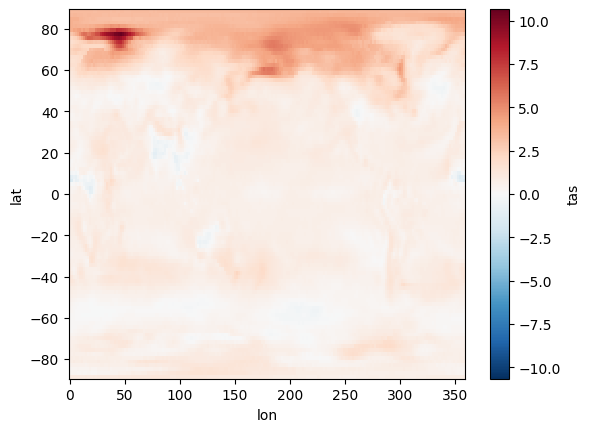

In [ ]:
# Do your plots
emulated_ds['tas'].mean('member').plot()

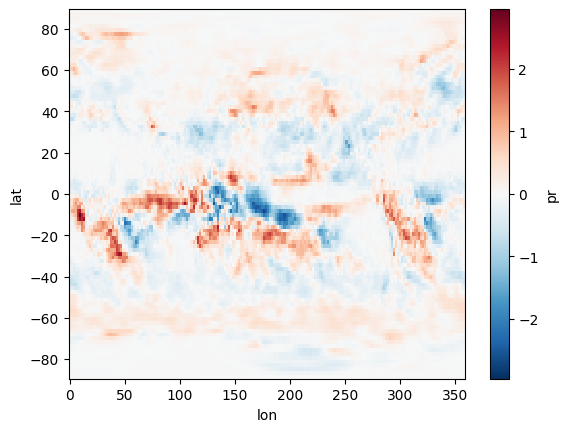

In [ ]:
emulated_ds['pr'].mean('member').plot()

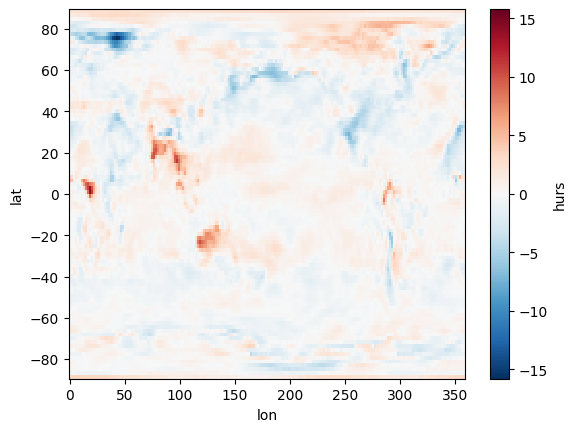

In [ ]:
emulated_ds['hurs'].mean('member').plot()

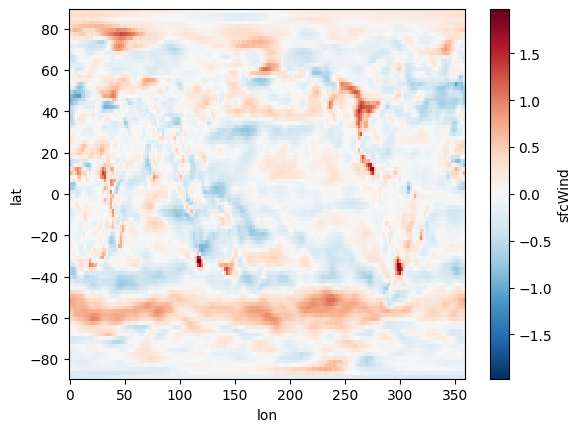

In [ ]:
emulated_ds['sfcWind'].mean('member').plot()